# __Loan Approval Prediction__

## __Metadata__

Information about loan applicants and their loan approval status may be found in the Loan Approval Classification Dataset, which was obtained via Kaggle. The dataset contains 45,000 records and 14 variables, each described below:

Demographic information: age, gender, education level
Financial information: Annual income, work experience "years", loan amount requested, loan intention
Credit information: Credit score, credit histoy length, previous loans
Asset information: home ownership
Target variable: Loan status (Approved/Rejected)

## __Purpose__

##### We are building a model to predict whether a loan will be approved or rejected based on different features

## __Import all libraries needed in this project__

In [35]:
# installing and Importing all libraries to be used
%pip install seaborn
%pip install plotly
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

## __Load and Read Dataset Into Pandas Dataframe__

In [2]:
df = pd.read_csv("./loan_data.xsls")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
df.shape

(45000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## __Data Preproecessing and Cleaning__

In [8]:
#  checking for null values
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

We don't have null values in our dataset

In [9]:
# we drop NA values just in case.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [10]:
# Looking for duplicates and droping them
dataset_len = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {dataset_len-len(df)} duplicates")

Removed 0 duplicates


No duplicates in the dataset

In [11]:
# Checking for missing values in rows
missig_values = df[df.isnull().any(axis=1)]

if not missig_values.empty:
     print(len(missig_values))
else:
    print("No missing value found")

No missing value found


## __Data Wrangling__

In [12]:
#Create dummies for client gender
gender_dummies = pd.get_dummies(df['person_gender'],dtype=int,drop_first=True)
df = pd.concat([df,gender_dummies], axis=1)
df.drop('person_gender',axis=1,inplace=True)
df

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,male
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1
44996,37.0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,0
44997,33.0,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,1
44998,29.0,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1


We droped "person_gender" column and replaced it with "male" column where 1 represent male and 0 represent female

In [13]:
# convert age, income, loan amount and length of credit history into int format
df['person_age'] = df['person_age'].astype('int')
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype('int')
df['person_income'] = df['person_income'].astype('int')
df['loan_amnt'] = df['loan_amnt'].astype('int')


In [14]:
df


,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,male
0,22,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1,0
1,21,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0,0
2,25,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1,0
3,23,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1,0
4,24,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1,1
44996,37,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1,0
44997,33,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1,1
44998,29,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1,1


In [15]:
# Listing categorical and numerical variables
categorical_cols = [var for var in df.columns if df[var].dtypes == 'object']
numerical_cols = [var for var in df.columns if df[var].dtypes != 'object']

print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numerical_cols}')

Categorical columns: ['person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'male']


## __Data Visualization__

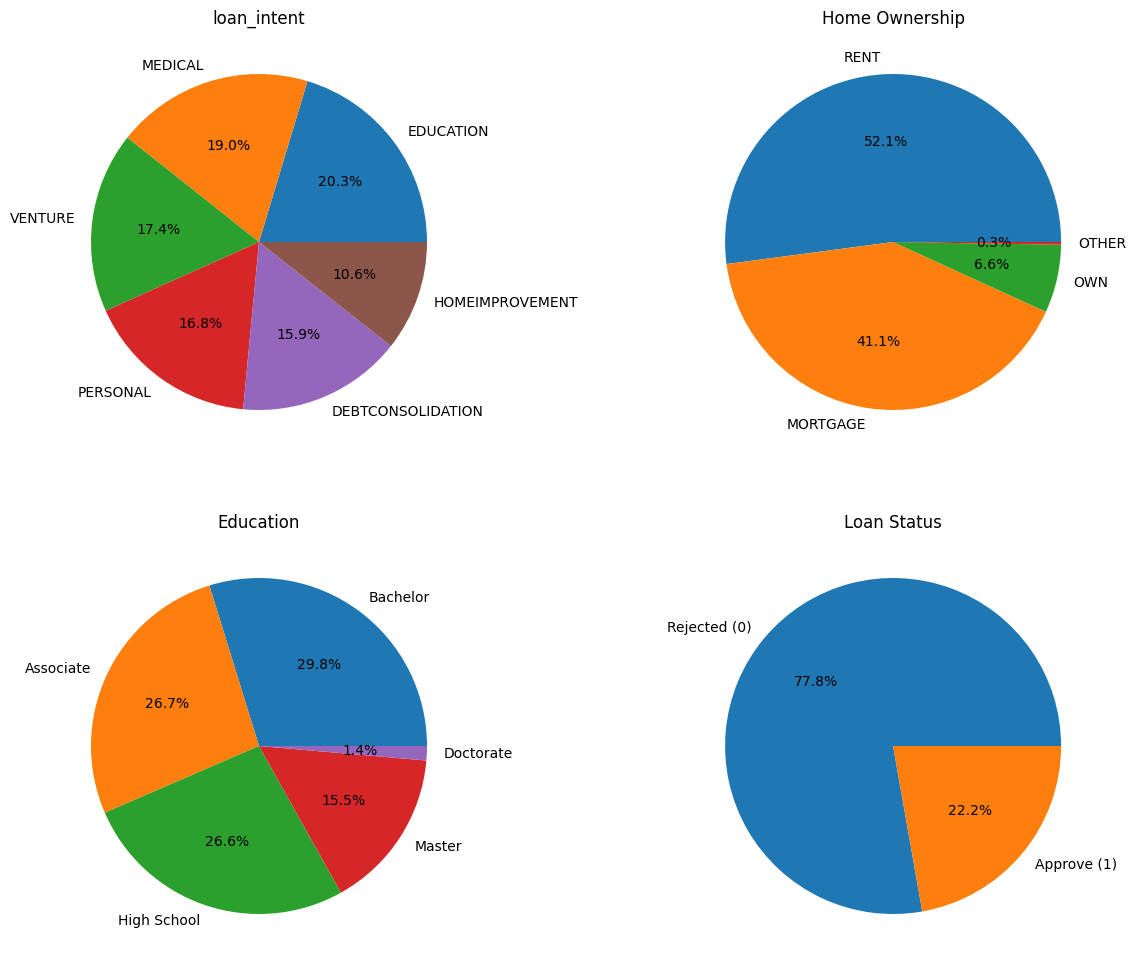

In [16]:
# plotting categorical variables


fig, axs = plt.subplots(2,2, figsize=(15,12))

loan_intent = df['loan_intent'].value_counts()
axs[0,0].pie(loan_intent, labels=loan_intent.index, autopct='%1.1f%%')
axs[0,0].set_title('loan_intent')

home_ownership = df['person_home_ownership'].value_counts()
axs[0,1].pie(home_ownership, labels=home_ownership.index, autopct='%1.1f%%')
axs[0,1].set_title('Home Ownership')

education = df['person_education'].value_counts()
axs[1,0].pie(education, labels=education.index, autopct='%1.1f%%')
axs[1,0].set_title('Education')

loan_status = df['loan_status'].value_counts()
axs[1,1].pie(loan_status, labels=['Rejected (0)','Approve (1)'], autopct='%1.1f%%')
axs[1,1].set_title('Loan Status');

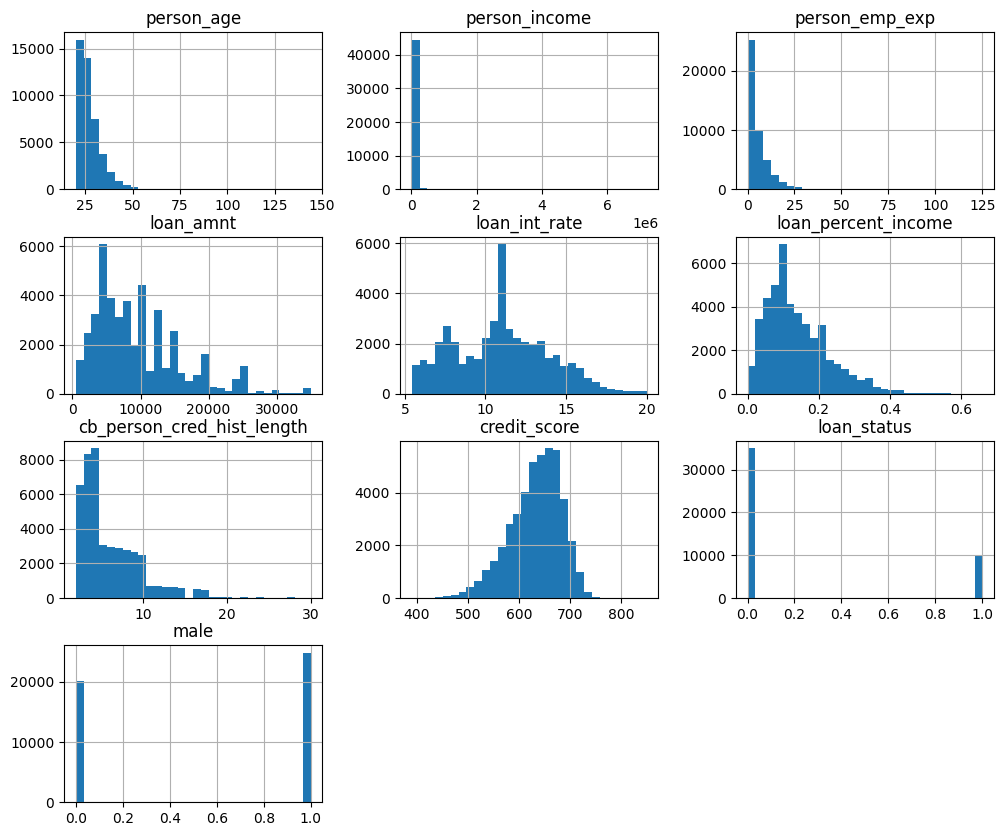

In [17]:
# plotting numerical variables
df[numerical_cols].hist(bins=30, figsize=(12,10))
plt.show()

## __Explantory Data Analysis__

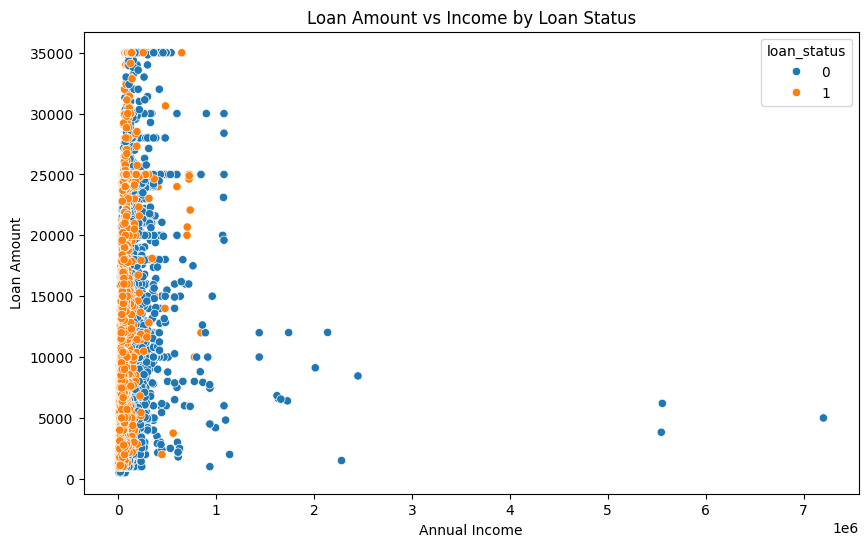

In [18]:
# line plot income against loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

As we can see, the amount of the loan that the individual requests is inversely correlated with their income.
For example, people with high incomes typically request little loans.


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

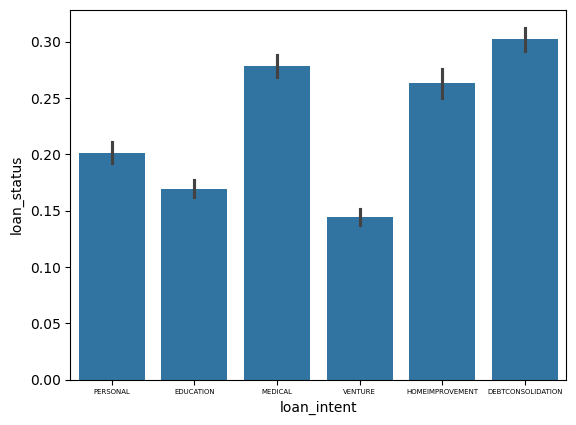

In [19]:
sns.barplot(data=df,x='loan_intent',y='loan_status')
plt.xticks(fontsize=5)

We see that people with Debt Consilidation loan intention had a better chance to get approved

<AxesSubplot:>

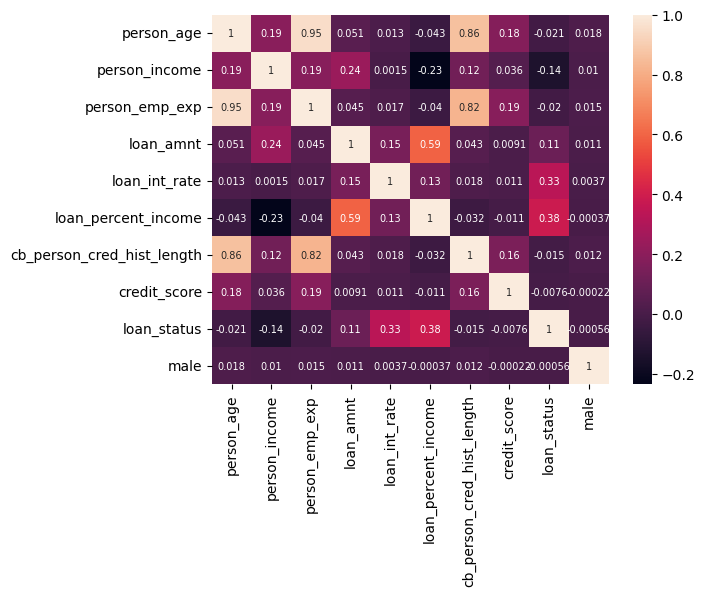

In [25]:
df_corr = df[numerical_cols]
#Checking collinearity
sns.heatmap(df_corr.corr(),annot=True,annot_kws={'size':7})

person_age, person_emp_exp and cb_person_cred_hist_length are highly correlated. I will keep person_age because it's the one with the highest correlation with loan_status

## __Model Building__

In [27]:
# preparing the dataframe for model building
modeling_dataframe = df.copy()
modeling_dataframe = pd.get_dummies(modeling_dataframe, drop_first = True)
bool_columns = modeling_dataframe.select_dtypes(include='bool').columns
modeling_dataframe[bool_columns] = modeling_dataframe[bool_columns].astype(int)

x = modeling_dataframe.drop(columns=['loan_status'])
y = modeling_dataframe['loan_status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
c_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scoring = ['accuracy', 'precision', 'f1']



### Logistic Regression

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression(random_state = 42)
log_reg_scores = cross_validate(log_reg, X_scaled, y_train, cv = c_validation, scoring = model_scoring, return_train_score = False)

log_reg.fit(X_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)


print("\nLogistic Regression evaluation on the test data:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1-Score: {test_f1:.4f}")

print("\nCross Validation Logistic regression scores:")
for metric in model_scoring:
    print(f"{metric.capitalize()}: {log_reg_scores['test_' + metric].mean():.4f}")


Logistic Regression evaluation on the test data:
Accuracy: 0.8944
Precision: 0.7752
F1-Score: 0.7586

Cross Validation Logistic regression scores:
Accuracy: 0.8971
Precision: 0.7791
F1: 0.7635


### K-Nearest Neighbor

In [34]:
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_train)

knn = KNeighborsClassifier()
knn_scores = cross_validate(knn, X_normalized, y_train, cv = c_validation, scoring = model_scoring, return_train_score = False)

knn.fit(X_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)


print("\nK-Nearest Neighbor evaluation on the test data:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("\ncross validation KNN scores:")
for metric in model_scoring:
    print(f"{metric.capitalize()}: {knn_scores['test_' + metric].mean():.4f}")


K-Nearest Neighbor evaluation on the test data:
Accuracy: 0.8893
Precision: 0.7937
F1-Score: 0.7334

cross validation KNN scores:
Accuracy: 0.8896
Precision: 0.7878
F1: 0.7343


### Random Forest

In [39]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest_scores = cross_validate(random_forest, X_scaled, y_train, cv = c_validation, scoring = model_scoring, return_train_score = False)

random_forest.fit(X_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = random_forest.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)


print("\nRandom Forest evaluation on the test data:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1-Score: {test_f1:.4f}")

print("\ncross validation Random forest scores:")
for metric in model_scoring:
    print(f"{metric.capitalize()}: {random_forest_scores['test_' + metric].mean():.4f}")


Random Forest evaluation on the test data:
Accuracy: 0.9300
Precision: 0.8998
F1-Score: 0.8314

cross validation Random forest scores:
Accuracy: 0.9273
Precision: 0.8942
F1: 0.8234


## __Conclusion__

In conclusion, Random Forest algorithm is best suited for this data since it had a better accuracy of **93.00%** on test data and **92.73%** using cross validation method. Logistic Regression and K-Nearest Neighbor had accuracy of **89.44%** and **88.93%** respectively.